# ML4FG Final Report: Modeling Colorectal Cancer Gene Expression Distributions using Mixture Models

Authors: Shomik Ghose (sg3789@columbia.edu), Austin Tao (alt2177@columbia.edu)

In [ ]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing dataset
df = pd.read_csv("drive/MyDrive/ML4FG Final Project/Bodmer_microarray_phenotype.csv",index_col=0)
df.head()

,C10,C106,C125PM,C32,C70,C75,C80,C84,C99,CACO2,...,SW403,SW48,SW480,SW837,SW948,T84,VACO10MS,VACO429,VACO4A,VACO5
DDR1,11.10390,11.07910,11.17970,11.50680,11.08760,11.33030,11.09560,11.21460,11.53890,10.14060,...,11.15560,11.43050,11.04630,11.10180,11.32870,10.85770,11.01680,11.20140,9.80261,9.81900
RFC2,9.45475,9.00771,9.86042,9.52498,9.53370,8.79881,7.31596,9.19284,7.42561,9.42345,...,9.39105,10.02960,10.24310,9.57473,9.67545,9.74446,9.24474,8.27504,9.62195,10.30300
HSPA6,6.33489,6.08624,5.99624,6.29194,5.76445,5.87747,5.89491,5.85956,5.78572,5.63281,...,5.97411,5.91963,5.75286,6.08853,5.73124,5.94438,5.90822,6.55251,6.08932,5.82700
PAX8,8.34283,8.80605,8.27972,8.97679,8.61314,8.24204,8.42736,8.63846,8.51370,8.27960,...,8.43641,8.69135,8.96714,8.78303,8.99510,8.36773,8.94381,8.31004,8.47219,8.28388
GUCA1A,3.77159,3.68338,3.91228,3.73648,3.64068,3.81183,3.76107,3.78736,3.89909,3.70464,...,3.68933,3.80050,3.94595,3.78618,3.74473,3.90953,4.00774,3.63841,4.01677,3.74778


## Data Preprocessing

In [ ]:
df.shape

(54702, 78)

**Handling Duplicates**

In [ ]:
#There are 33625 duplicates
df.index.duplicated().sum()

33625

In [ ]:
#Relabeling duplicates
df.index = df.index + ("_"+df.groupby(level=0).cumcount().astype(str)).replace('_0','')
df.head()

,C10,C106,C125PM,C32,C70,C75,C80,C84,C99,CACO2,...,SW403,SW48,SW480,SW837,SW948,T84,VACO10MS,VACO429,VACO4A,VACO5
DDR1,11.10390,11.07910,11.17970,11.50680,11.08760,11.33030,11.09560,11.21460,11.53890,10.14060,...,11.15560,11.43050,11.04630,11.10180,11.32870,10.85770,11.01680,11.20140,9.80261,9.81900
RFC2,9.45475,9.00771,9.86042,9.52498,9.53370,8.79881,7.31596,9.19284,7.42561,9.42345,...,9.39105,10.02960,10.24310,9.57473,9.67545,9.74446,9.24474,8.27504,9.62195,10.30300
HSPA6,6.33489,6.08624,5.99624,6.29194,5.76445,5.87747,5.89491,5.85956,5.78572,5.63281,...,5.97411,5.91963,5.75286,6.08853,5.73124,5.94438,5.90822,6.55251,6.08932,5.82700
PAX8,8.34283,8.80605,8.27972,8.97679,8.61314,8.24204,8.42736,8.63846,8.51370,8.27960,...,8.43641,8.69135,8.96714,8.78303,8.99510,8.36773,8.94381,8.31004,8.47219,8.28388
GUCA1A,3.77159,3.68338,3.91228,3.73648,3.64068,3.81183,3.76107,3.78736,3.89909,3.70464,...,3.68933,3.80050,3.94595,3.78618,3.74473,3.90953,4.00774,3.63841,4.01677,3.74778


In [ ]:
#Removed all duplicates
df.index.duplicated().sum()

0

In [ ]:
df.loc[["CDH1","CDH1_1"],:]

,C10,C106,C125PM,C32,C70,C75,C80,C84,C99,CACO2,...,SW403,SW48,SW480,SW837,SW948,T84,VACO10MS,VACO429,VACO4A,VACO5
CDH1,8.84476,8.43063,9.05031,9.41713,8.56102,8.34133,10.6095,10.1148,10.9150,9.90415,...,8.50438,8.31705,6.00528,8.74518,8.50366,9.1853,9.56729,6.43262,8.70961,7.86674
CDH1_1,11.83090,13.22360,12.34470,11.83150,11.90950,12.01860,13.2421,12.7547,13.4284,12.83840,...,12.26220,11.80070,8.95743,11.76250,12.13570,12.6199,12.40240,10.14970,11.37710,11.09120


**Handling Null Values**

We chose to keep nan values because if we turn nan values into 0, that will skew the distribution (since we want the nan value to be omitted from the analysis, not to beincluded as 0 since 0 has real meaning in this case).

In [ ]:
#Isolating a row of the data to run the model on
temp = df.loc['CDH1',:].dropna()
#Reshaping the input array to make it two-dimensional
inp = np.array(temp).reshape(-1, 1)

## Gaussian Mixture Model using Expectation-Maximization Algorithm

In [ ]:
#Functions to determine our model selection/goodness of fit metrics

#Writing a function to identify which indices in a sorted list a number lies between
#Parameters are "lis" (a sorted list from least to greatest) and "num" (a number of the user's choosing)
#The function returns the index of the maximum number in the list that is less than "num"
def find_ind(num, lis):
  i = 0
  while num > lis[i+1]:
    i += 1
  return i

#Writing a function to identify the area under a curve using the rectangular area approximation
#Parameters are "xl" and "yl" (the x and y values of the curve)
def rec_area_under(xl,yl):
  aund = 0
  for i in range(len(xl)-1):
    aund += (yl[i]*(xl[i+1]-xl[i]))
  return aund

#Writing a function to calculate our "Adjusted Least Squares" (ALS) metric
#Parameters are "bins" (the y-values of the bins in the histogram) and "preds" (the y-values (likelihoods) of the curve fitted to the distribution) 
ind_test = []
def ls_metric(preds, bins):
  ls_ls = 0
  for i in range(len(x)):
    ind = find_ind(x[i],bins)
    ind_test.append(ind)
    ls_ls += (abs(counts[ind]-preds[i])**2)
  return ls_ls

#Writing a function to calculate our "Area Under Difference" (AUD) metric
#Parameters are "hx" and "hy" (the x and y values of the bins in the histogram) and "px" and "py" (the x and y values of the curve fitted to the distribution)
def ar_metric(hx,hy,px,py):
  hund = rec_area_under(hx,hy)
  pund = rec_area_under(px,py)
  return pund-hund

In [ ]:
# Gaussian EM algorithm
def em_fit(X, num_components, epochs, show_plots):
  """Function to perform EM algorithm for Gaussian Mixture Model

  :Inputs:
   - *X* (vector) Input data
   - *num_components* (positive int) Desired number of clusters
   - *epochs* (positive int) Desired number of iterations to perform
   - *show_plots* (boolean) Show or don't show plots

  :Outputs:
   - *gaussians* Fitted gaussians
   - *lls* Log-likelihoods
   - *bic* Bayesian Information Criterion 
   - *scores[-1][0]+scores[-1][1]* Likelihood scores corresponding to each sample

  """

  gaussians = []
  denoms = np.zeros(num_components)
  gaussians = [norm(loc=9,scale=5),norm(loc=-1,scale=2)]
  for i in range(num_components):
    #gaussians.append(norm(loc=np.random.randint(-2,2),scale=np.random.randint(0,2))) #Instantiate Gaussians
    #gaussians.append(norm(loc=np.random.randint(5,10),scale=np.random.randint(1,2)))
    denoms[i] = 1/num_components
  
  denoms = denoms/np.sum(denoms)
  X_rs = np.reshape(X,(X.shape[0],))

  scores = []
  lls = []

  for epoch in range(epochs):
    
    if show_plots:
      cols = ['r','g','b']
      fig, ax = plt.subplots()
      counts, bins, bars = ax.hist(X_rs,weights=np.ones(len(X_rs)) / len(X_rs),ec="black")
      for i in range(num_components):
        x = X_rs
        y = gaussians[i].pdf(X)
        y = y*max(counts)/max(y)
        x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
        ax.plot(x,y,"-k",c=cols[i])
      plt.show()


    gamma = np.zeros((X.shape[0],num_components))

    #E-step
    for i in range(num_components):
      gamma[:,i] = denoms[i]*gaussians[i].pdf(X_rs)
  
    #Row normalizing gamma matrix
    tt = np.sum(gamma,axis=1)
    for i in range(num_components):
      gamma[i] /= (np.sum(denoms)*tt[i])

    #M-step

    #Updating weight of each cluster
    fracs=[]
    for i in range(num_components):
      fracs.append(np.sum(gamma[:,i]))

    #Updating class distribution of each cluster
    pi_k=[]
    for i in range(num_components):
      pi_k.append(fracs[i]/np.sum(fracs))
    
    #Updating means of each cluster
    mu_k = np.sum(gamma*X,axis=0)/fracs

    #Updating variance of each cluster
    var_k=[]
    for i in range(num_components):
      tmp = (1/fracs[i])*np.dot((np.reshape(np.array(gamma[:,i]),(X.shape[0],1))*(X-mu_k[i])).T,(X-mu_k[i]))
      var_k.append(tmp[0,0])

    #Updating Gaussians with new mean and variance
    for i in range(num_components):
      print(mu_k[i],var_k[i])
      gaussians[i] = norm(loc=mu_k[i],scale=var_k[i])

    #Calculating likelihoods (on both per-sample and full-dataset level) for each epoch
    ll_temp = []
    for i in range(num_components):
      ll_temp.append(fracs[i]*gaussians[i].pdf(X_rs))
    scores.append(ll_temp)
    lls.append(np.log(np.sum(ll_temp)))

  #Calculating BIC
  #Gaussian mixture model has 2 parameters (mean, variance)
  bic = -2*lls[-1]+np.log(X.shape[0])*2 

  #Plotting the fit for each epoch
  if show_plots:
    cols = ['r','g','b']
    fig, ax = plt.subplots()
    counts, bins, bars = ax.hist(X_rs,weights=np.ones(len(X_rs)) / len(X_rs),ec="black")
    for i in range(num_components):
      x = X_rs
      y = gaussians[i].pdf(X)
      y = y*max(counts)/max(y) #This line normalizes the y-values of the curve so we can compare the histogram and fitted curve on the same scale
      x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
      ax.plot(x,y,"-k",c=cols[i])
    plt.show()
  
  return gaussians, lls, bic, scores[-1][0]+scores[-1][1]

### Plotting Results of Gaussian Mixture Model

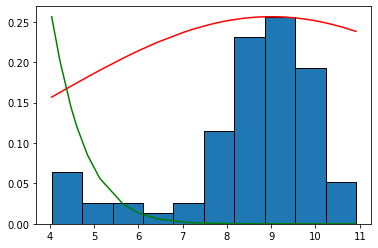

8.629606142592552 1.2157294752616974
4.502648049897454 0.30635849935749154


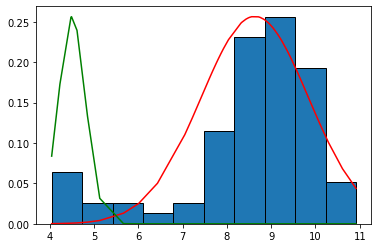

8.849972422893362 0.4568885851734893
4.502757146287934 0.05347509366432735


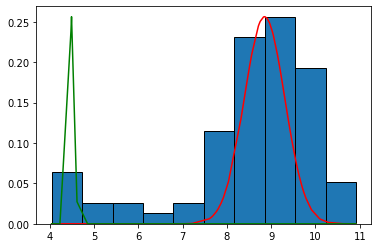

-2.985309608779003


In [ ]:
gmfit, ll1, bicg, ss = em_fit(inp,2,2,True)
print(bicg)

BIC: -2.985309608779003
ALS: 1.6514427504765772
AUD: -0.523759886135391


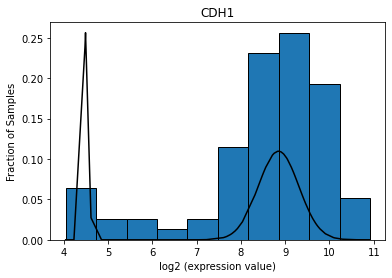

In [ ]:
fig, ax = plt.subplots()
counts, bins, bars = ax.hist(temp,weights=np.ones(len(temp)) / len(temp),ec="black")  #the "weights" argument makes sure we graph the ratio rather than the count of frequencies on the y-axis
x = temp
y = ss
y = y*max(counts)/max(y)  #This line normalizes the y-values of the curve so we can compare the histogram and fitted curve on the same scale
x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
plt.title("CDH1")
plt.xlabel("log2 (expression value)")
plt.ylabel("Fraction of Samples")
print("BIC: " + str(bicg))
print("ALS: " + str(ls_metric(y,bins)))
print("AUD: " + str(ar_metric(bins,counts,x,y)))
ax.plot(x,y,"-k")

## Shifted Asymmetric Laplace (SAL) Mixture Model using EM
To perform the SAL EM algorithm, we first need to define the probability density function of the SAL, here denoted by 
$$
    \xi (\textbf{x} \mid \boldsymbol{\alpha}, \boldsymbol{\Sigma}, \boldsymbol{\mu})
$$


In [ ]:
from scipy.special import kn # modified bessel function of the second kind of integer order n
from scipy.stats import expon, multivariate_normal, laplace_asymmetric 
from scipy.spatial import distance 

In [ ]:
def xi(p, X, a, cov, mu):
  """Calculate density of p-dimensional SAL distribution

  :Input:
   - *p* (int) Dimensionality of SAL distribution
   - *x* (p-dimensional vector) 
   - *a* (p-dimensional vector) skewness
   - *cov* (p x p matrix) covariance matrix
   - *mu* (p-dimensional vector) shift parameter

  :Output:
   - *xi* Density of SAL distribution at X
  """
  xi = np.empty(X.shape[0])
  d = distance.mahalanobis(X, mu, np.linalg.inv(cov))**2
  u = np.sqrt((2 + a.T @ np.linalg.inv(cov) @ a) * d)
  v = (2 - p) / 2

  for i in range(X.shape[0]):
    xi[i] = (2*np.exp((X - mu).T @ np.linalg.inv(cov) @ a)) / ((2*np.pi)**(p/2) * np.abs(np.linalg.norm(cov))**(1/2))
    xi[i] *= (d / (2 + a.T @ np.linalg.inv(cov) @ a))**(v/2)
    xi[i] *= kn(0, u)

  return xi

Now, we need to be able to compute the actual expectation. This is done using the modified Bessel function of third kind, denoted $K_{v}(x)$, where $v$ is the index. In particular, we follow these two equations for expectation of a Generalized Inverse Gaussian, which we can use to represent the SAL:
\begin{align}
    \mathbb{E}[X] &= \frac{\sqrt{b} K_{v + 1}(\sqrt{ab})}{\sqrt{a}K_v (\sqrt{ab})} & \mathbb{E}[1/X] &= \frac{\sqrt{a} K_{v + 1}(\sqrt{ab})}{\sqrt{b}K_v (\sqrt{ab})} - \frac{2v}{b}
\end{align}
for $x > 0$, $a, b \in \mathbb{R}^+$, and $v \in \mathbb{R}$

In [ ]:
# From page 2 of Franczak et al.
def expectation(a, b, v):
  """Calculate E[X] for a Generalized Inverse Gaussian (GIG)
  
  :Input:
   - *a* (float) positive real number
   - *b* (float) positive real number
   - *v* (float) real number

  :Output:
   - *E* (float) expectation of GIG
  """

  num = np.sqrt(b) * kn(v + 1, np.sqrt(a*b))
  denom = np.sqrt(a) * kn(v, np.sqrt(a*b))

  E = num / denom

  return E

def expectation_r(a, b, v):
  """Calculate E[1/X] for a Generalized Inverse Gaussian (GIG)
  
  :Input:
   - *a* (float) positive real number
   - *b* (float) positive real number
   - *v* (float) real number

  :Output:
   - *E* (float) reciprocal expectation of GIG
  """

  num = np.sqrt(a) * kn(v + 1, np.sqrt(a*b))
  denom = np.sqrt(b) * kn(v, np.sqrt(a*b))

  E = (num / denom) - (2*v/b)

  return E

Now, we perform the expectation step of EM for SAL:

In [ ]:
# From page 4 of Franczak et al.
def SAL_expectation(X, t, p, cov, alpha, mu):
  """Calculate the expected value Q of the complete-data log-likelihood
     for a Shifted Asymmetric Laplace distribution

  :Input:
   - *X* (N x 1 vector) Observed data
   - *t* (N x G matrix) Component membership labels tau (each tau is a one-hot-encoded vector)
   - *p* (int) Dimensionality of SAL distribution
   - *cov* (G x G matrix) Covariance matrix
   - *alpha* (p x 1 vector) Skewness
   - *mu* (p x 1 vector) shift parameter

   :Output:
   - Q (float) Expectation
  """
  # ========================= Initialize variables =============================
  G = t.shape[1]
  N = t.shape[0]
  pi = [1/G for i in range(G)]
  W = expon()
  v = 1 # random initialization for v

  # Define terms used in expectation calculation for E[X] and E[1/X]
  a = 2 + alpha.T @ np.linalg.inv(cov) @ alpha
  b = distance.mahalanobis(X, mu, cov)**2
  
  # Define tau_g
  def t_g(x, alpha, cov, mu, g):
    num = pi[g] * xi(p, x, alpha, cov, mu)
    denom = 0
    for j in range(G):
      denom += pi[j] * xi(p, x, alpha, cov, mu)

    return num / denom

  # Define n_g
  def n_g(tau, g, N):
    n_g = 0
    for i in range(N):
      n_g += tau[i, g]

    return n_g
  
  # ======================== Calculating Expectation ==========================
  # Let Q be broken up into 8 individual terms calculated below
  q1, q2, q3, q4, q5, q6, q7, q8 = [0 for i in range(8)]

  for g in range(G):
    q1 += n_g(t, g, N) * np.log(pi[g])
  
  q2 = (N*p*np.log(2*np.pi)) / 2

  for i in range(N):
    q3 += expectation(np.log(a), np.log(b), v)
  q3 *= (N*p) / 2

  for g in range(G):
    q4 += (n_g(t, g, N)/2) * np.log(np.abs(np.linalg.inv(cov)))
  
  for i in range(N):
    for g in range(G):
      q5 += t_g(X[i], alpha, cov, mu, g) * (X[i] - mu).T @ np.linalg.inv(cov) @ alpha
  q5 *= 2

  for i in range(N):
    for g in range(G):
      q6 += t_g(X[i], alpha, cov, mu, g) * (X[i] - mu).T @ (expectation_r(a, b, v) * np.linalg.inv(cov)) @ (X[i] - mu)
  q6 *= (1/2)

  for i in range(N):
    for g in range(G):
      q7 += (t_g(X[i], alpha, cov, mu, g) * expectation(a, b, v) * alpha.T) @ np.linalg.inv(cov) @ alpha
  q7 *= (1/2)

  for i in range(N):
    for g in range(G):
      q8 += t_g(X[i], alpha, cov, mu, g) * expectation(a, b, v)

  Q = q1 - q2 - q3 + q4 + q5 - q6 - q7 - q8
  
  return Q

In [ ]:
# Testing Expectation function for SAL EM
p = 1
X = np.random.randint(1, 10, size=(p, 1))
a = np.random.randint(1, 10, size=(p, 1))
mu = np.random.rand(p, 1)

# generate covariance matrix
temp = np.random.randint(1, 100, size=(p, p))
cov = np.dot(temp, temp.T) # guaranteed positive semi-definite

# Create tau indicator vector matrix
tau = np.zeros((p, p))
for i in range(tau.shape[1]):
  tau[i, i] = 1

E = SAL_expectation(X, tau, p, cov, a, mu)
print("Expectation: ", E)

Expectation:  [[-151.17073233]]


Now, we perform the maximization step of the EM algorithm for SAL:

In [ ]:
from tempfile import template
# From page 4 of Franczak et al.
def SAL_maximization(X, t, p, cov, alpha, mu):
  """Maximize the expectation of the log likelihood w.r.t. model parameters
     and update model parameters

  :Input:
   - *X* (N x 1 vector) Observed data
   - *t* (N x G matrix) Component membership labels tau (each tau is a one-hot-encoded vector)
   - *p* (int) Dimensionality of SAL distribution
   - *cov* (G x G matrix) Covariance matrix
   - *alpha* (p x 1 vector) Skewness
   - *mu* (p x 1 vector) shift parameter

   :Output:
   - *cov* (G x G matrix) Updated Covariance matrix
   - *alpha* (p x 1 vector) Updated Skewness
   - *mu* (p x 1 vector) Updated shift parameter
  """

  # ========================= Initialize variables =============================
  G = t.shape[1]
  N = t.shape[0]
  pi = [1/G for i in range(G)]
  W = expon()
  v = 1 # random initialization for v

  # Define terms used in expectation calculation for E[X] and E[1/X]
  a = 2 + alpha.T @ np.linalg.inv(cov) @ alpha
  b = distance.mahalanobis(X, mu, cov)**2
  
  # Define tau_g
  def t_g(x, alpha, cov, mu, g):
    num = pi[g] * xi(p, x, alpha, cov, mu)
    denom = 0
    for j in range(G):
      denom += pi[j] * xi(p, x, alpha, cov, mu)

    return num / denom

  # Define n_g
  def n_g(tau, g, N):
    n_g = 0
    for i in range(N):
      n_g += tau[i, g]

    return n_g

  # ============================ Parameter Updates =============================
  # Update alpha
  alpha_num, alpha_denom = 0, 0
  for i in range(N):
    alpha_num += t_g(X, alpha, cov, mu, i) * expectation_r(a, b, v)
  
  temp = 0
  for i in range(N):
    temp += t_g(X, alpha, cov, mu, i) * X[i] - n_g(t, i, N)

  alpha_num *= temp
  temp = 0
  for i in range(N):
    temp += t_g(X, alpha, cov, mu, i) * expectation_r(a, b, v) * X[i]

  alpha_num *= temp

  for i in range(N):
    alpha_denom += t_g(X, alpha, cov, mu, i) * expectation(a, b, v)

  temp = 0
  for i in range(N):
    temp += t_g(X, alpha, cov, mu, i) * expectation_r(a, b, v) - n_g(t, i, N)**2
  
  alpha_denom *= temp
  alpha = alpha_num / alpha_denom

  # Update mu
  mu_num, mu_denom = 0, 0
  for i in range(N):
    mu_num += t_g(X, alpha, cov, mu, i) * expectation(a, b, v)

  temp = 0
  for i in range(N):
    temp += expectation_r(a, b, v) * X[i]

  temp2 = 0
  for i in range(N):
    temp2 += t_g(X, alpha, cov, mu, i) * X[i]
  temp2 *= n_g(t, 0, N)

  mu_num = mu_num * temp - temp2

  for i in range(N):
    mu_denom += t_g(X, alpha, cov, mu, i) * expectation(a, b, v)

  temp = 0
  for i in range(N):
    temp += expectation_r(a, b, v) - n_g(t, i, N)**2

  mu_denom *= temp

  mu = mu_num / mu_denom

  # Update covariance
  s_g, r_g = 0, 0

  for i in range(N):
    s_g += (t_g(X, alpha, cov, mu, i) * expectation_r(a, b, v) * (X[i] - mu)) @ (X[i] - mu).T
  s_g *= n_g(t, 0, N)

  for i in range(N):
    r_g += t_g(X, alpha, cov, mu, i) * (X[i] - mu)
  r_g *= n_g(t, 0, N)

  temp = 0
  for i in range(N):
    temp += t_g(X, alpha, cov, mu, i) * expectation(a, b, v)

  cov = s_g - (alpha @ r_g.T) - (r_g @ alpha.T) + (((1/n_g(t, 0, N)) * alpha) @ alpha.T) * temp

  return alpha, cov, mu

In [ ]:
# Testing Maximization function for SAL EM
p = 1
X = np.random.randint(1, 10, size=(p, 1))
alpha = np.random.randint(1, 10, size=(p, 1))
mu = np.random.rand(p, 1)

# generate covariance matrix
temp = np.random.randint(1, 100, size=(p, p))
cov = np.dot(temp, temp.T) # guaranteed positive semi-definite

# Create tau indicator vector matrix
tau = np.zeros((p, p))
for i in range(tau.shape[1]):
  tau[i, i] = 1

alpha, cov, mu = SAL_maximization(X, tau, p, cov, alpha, mu)
print("alpha: ", alpha, "covariance: ", cov, "mu: ", mu)

alpha:  [[-3.81169475e-06]] covariance:  [[0.10907965]] mu:  [[-9.3331685e-05]]


Below, we actually perform the EM algorithm for SAL after completing the expectation calculation:

In [ ]:
def EM_SAL(X, num_components, num_epochs, show_plots):
  """Perform the EM-algorithm on the SAL mixture model

  :Inputs:
   - *X* (vector) Observed data
   - *num_components* (int) The number of clusters/components
   - *num_epochs* (int) Number of epochs to perform
   - *show_plots* (boolean) Show or don't show plots

  """
  # Initialize necessary variables
  p = X.shape[0]
  alpha = np.random.randint(1, 10, size=(p, 1))
  mu = np.random.rand(p, 1)

  temp = np.random.randint(1, 100, size=(p, p))
  cov = np.dot(temp, temp.T)

  # Create tau indicator vector matrix
  tau = np.zeros((p, p))
  for i in range(tau.shape[1]):
    tau[i, i] = 1

  # Initialize SAL distributions
  laps = []
  denoms = np.zeros(num_components)
  for i in range(num_components):
    laps.append(laplace_asymmetric(kappa=np.random.randint(0,5),loc=np.random.randint(8,10),scale=np.random.randint(1,2)))
    denoms[i] = 1/num_components
  
  denoms = denoms/np.sum(denoms)

  gamma = np.zeros((X.shape[0],num_components))

  # Iterate over number of epochs
  for epoch in range(num_epochs):
    
    E = SAL_expectation(X, tau, p, cov, alpha, mu)
    # print("Expectation: ", E)
    alpha, cov, mu = SAL_maximization(X, tau, p, cov, alpha, mu)
    # print("Alpha: ", alpha, "Covariance: ", cov, "Mu: ", mu)

    # =========== Plotting ================
    X_rs = np.reshape(X,(X.shape[0],))

    if show_plots:
      cols = ['r','g','b']
      fig, ax = plt.subplots()
      counts, bins, bars = ax.hist(X_rs, weights=np.ones(len(X_rs)) / len(X_rs), ec="black")
      for i in range(num_components):
        x = X_rs
        y = laps[i].pdf(X)
        y = y*max(counts)/max(y)
        x,y = zip(*sorted(zip(x,y),key=lambda x: x[0]))
        ax.plot(x,y,"-k",c=cols[i])
        ax.set_xlabel("$\log2$ (expression value)")
        ax.set_ylabel("Fraction of Samples")
        ax.set_title("Asymmetric Laplace Distributions")
      
      plt.show()

    for i in range(num_components):
      laps[i] = laplace_asymmetric(kappa=np.random.randint(0,5),loc=np.random.randint(8,10),scale=np.random.randint(1,2))
    

Performing EM for SAL. **Warning: runtime is VERY slow**

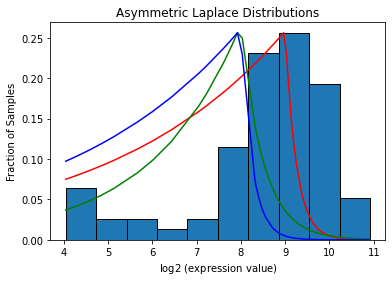

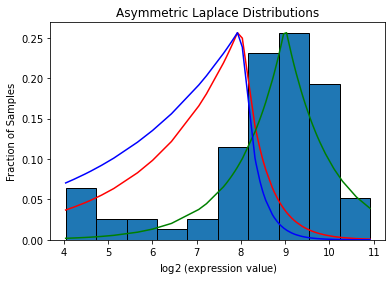

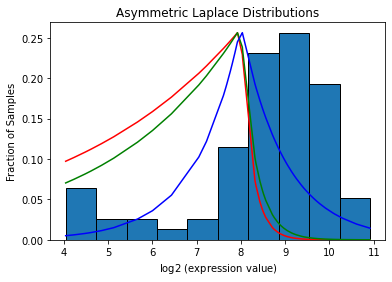

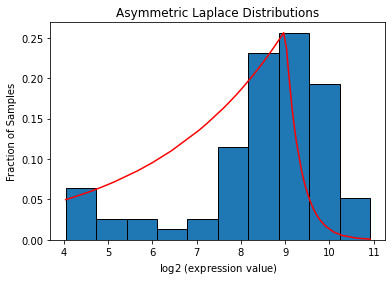

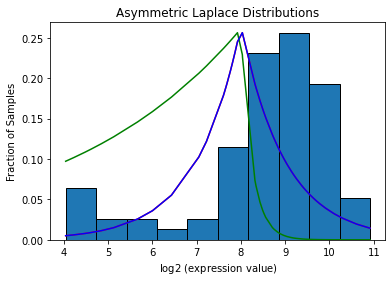

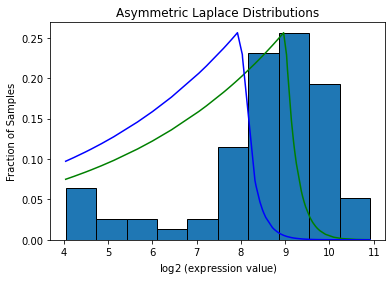

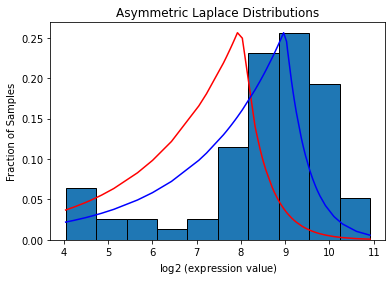

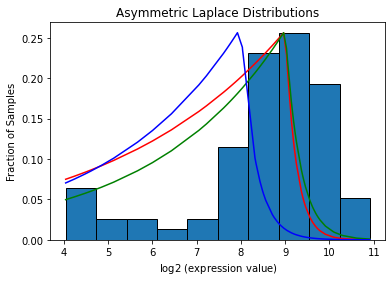

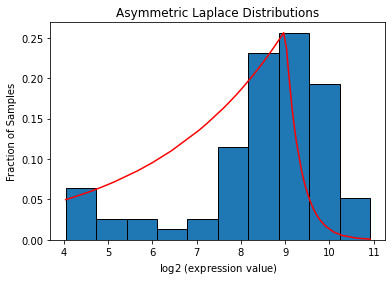

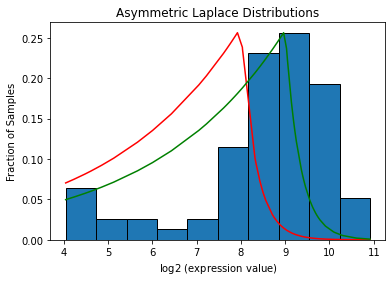

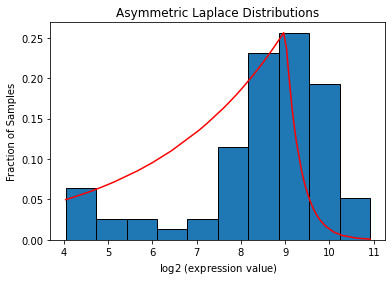

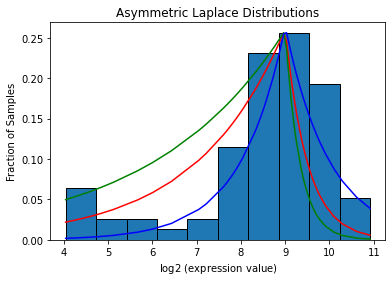

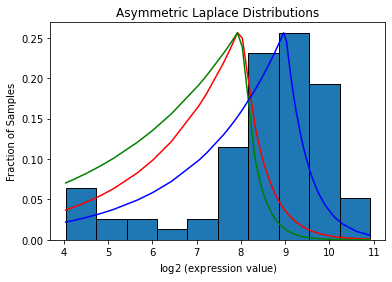

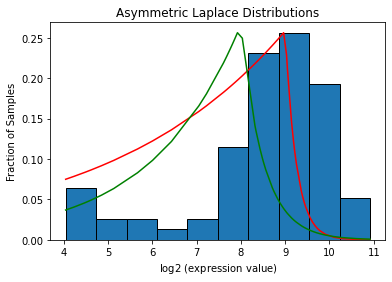

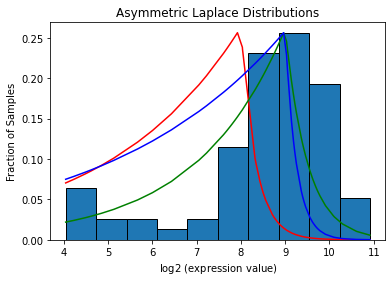

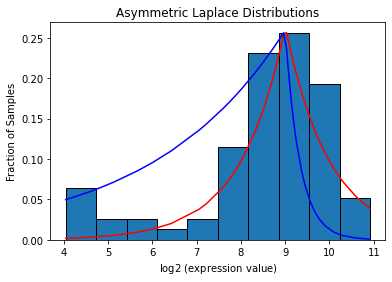

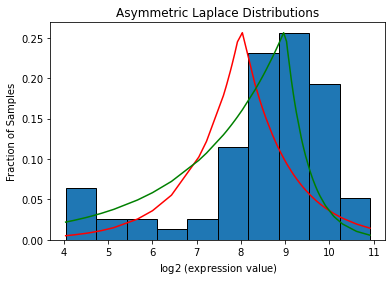

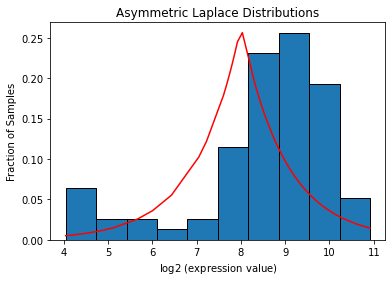

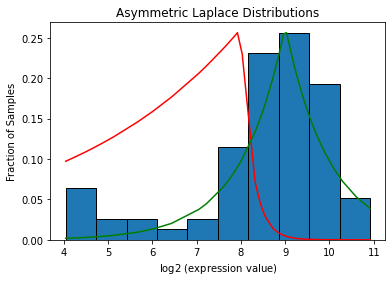

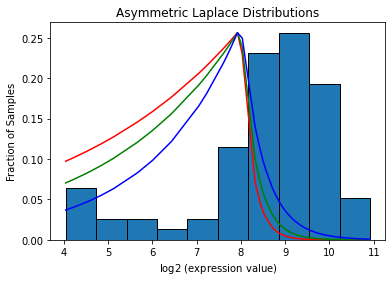

In [ ]:
num_components = 3
num_epochs = 20
EM_SAL(inp, num_components, num_epochs, show_plots=True)